# Heart Disease Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("../input/heart-failure-prediction/heart.csv")
df.shape

(918, 12)

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

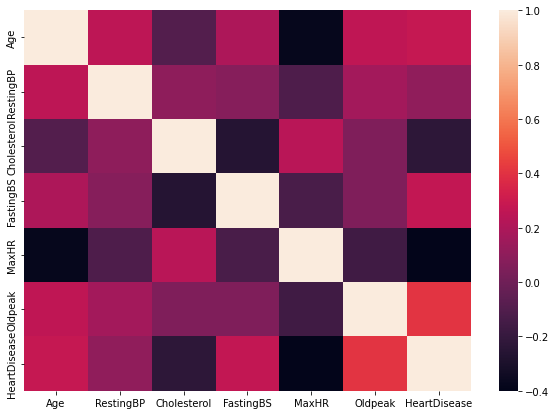

In [5]:
fig = plt.figure(figsize=(10, 7))
sns.heatmap(df.corr())
plt.show()

* The features are not related to each other. No Multicollinearity!

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

* There are no missing values in the dataset!

# Data Storytelling

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
def plot_violin(x_variable, y_variable):
    fig = plt.figure(figsize=(10, 7))
    sns.violinplot(x=x_variable, y=y_variable)
    plt.show()
    return 0

## Numerical Features

**Age**

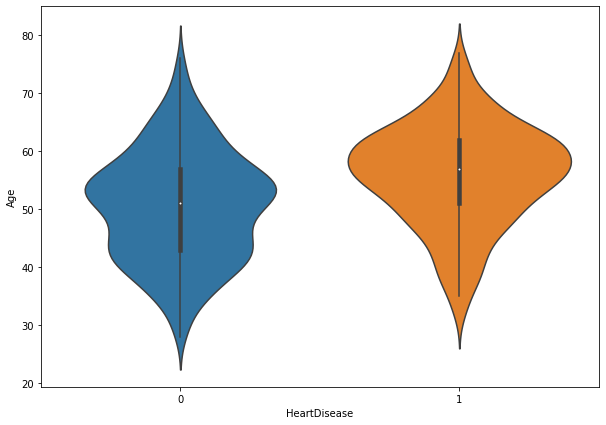

0

In [9]:
plot_violin(df["HeartDisease"], df["Age"])

In [10]:
df[df["Age"] < 50]["HeartDisease"].value_counts()

0    180
1    111
Name: HeartDisease, dtype: int64

In [11]:
df[df["Age"] > 50]["HeartDisease"].value_counts()

1    383
0    219
Name: HeartDisease, dtype: int64

* From the violin plot, it can be concluded that the patient with age less than 50 is more likely to not have heart disease.
* And patient with age more than 50 is likely to have heart disease.
* The probability that the patient will have heart disease given that he/she is younger than 50 years is 39%
* The probability that the patient will have heart disease given that he/she is older than 50 years is 63%

**RestingBP**

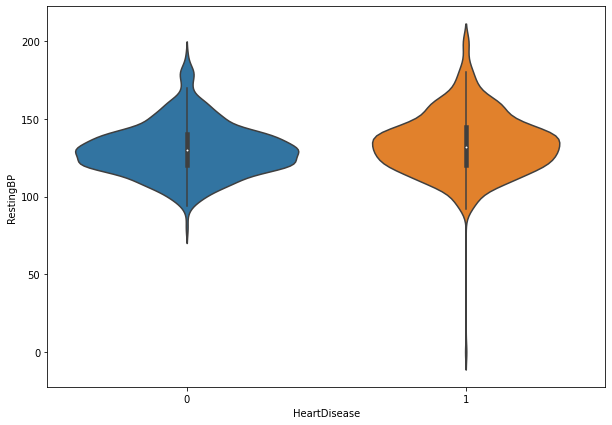

0

In [12]:
plot_violin(df["HeartDisease"], df["RestingBP"])

In [13]:
df[df["RestingBP"] > 140]["HeartDisease"].value_counts()

1    150
0     70
Name: HeartDisease, dtype: int64

* RestingBP is the blood pressure of a patient when at rest.
* From the plot, it can be concluded that this BP is of type Systolic Blood Pressure.
* The Normal range is between 120 - 130 mm Hg.
* The patient have high chance of having heart disease when the RestingBP increases above 140 mm Hg.
* In the dataset, the probability of a person will have heart disease given that his/her RestingBP is above 140 mm Hg is 68%.

**Cholesterol**

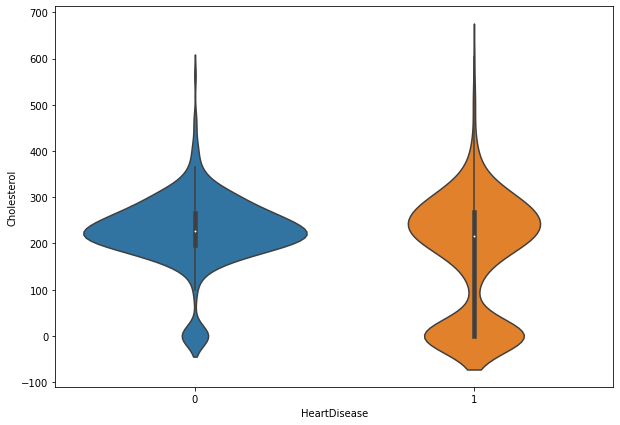

0

In [14]:
plot_violin(df["HeartDisease"], df["Cholesterol"])

In [15]:
df[df["Cholesterol"] > 220]["HeartDisease"].value_counts()

1    242
0    229
Name: HeartDisease, dtype: int64

* Cholesterol is found is cells of human body. It helps produce VitaminD and Hormones.
* Excess amount of Cholesterol can cause Heart Disease.
* The normal range of cholesterol is below 200 mg/dL.
* The cholesterol range between 200 - 239 mg/dl is considered borderline high.
* Cholesterol level above 240 mg/dl is considered high.
* The patient will have heart disease given that the patient has cholestrol above 220 mg/dl is 51%.
* There are patients in the dataset, who despite having low cholesterol have heart disease. It can be because there are other features also which affect the patients heart condition.
* This feature will not be used, Because of the last two points.

**MaxHR**

In [16]:
def apprx_maxHR(age):
    return (220 - age)

maxHR_apprx = df["Age"].apply(apprx_maxHR)

df["MaxHR_limit"] = maxHR_apprx - df["MaxHR"]

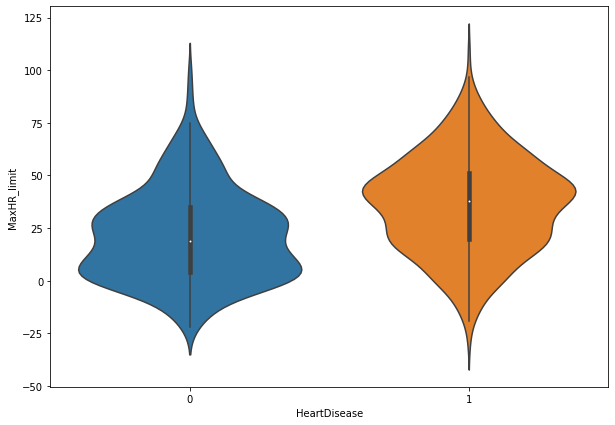

0

In [17]:
plot_violin(df["HeartDisease"], df["MaxHR_limit"])

In [18]:
df[df["MaxHR_limit"] > 0]["HeartDisease"].value_counts()

1    475
0    339
Name: HeartDisease, dtype: int64

In [19]:
df[df["MaxHR_limit"] < 0]["HeartDisease"].value_counts()

0    57
1    30
Name: HeartDisease, dtype: int64

* MaxHR (Maximum Heart Rate) is the heart rate achieved during exercise.
* The Approx Maximum Heart Rate can be calculated by the expression = 220 - age_of_patient.
* It is recommended to keep the heart rate below the Approx Maximum Heart Rate to avoid heart problems.
* In the above cells, I created a new feature 'MaxHR_limit', which is difference between Approx MaxHR and Obeserved MaxHR
* If the output is below zero, then it means the patient's Obeserved MaxHR is greater than Approx MaxHR, This can cause heart problems.
* If the output is greater than zero, then it means the patient's Obeserved MaxHR is less than Approx MaxHR.
* In the dataset, there are very few patients with less than zero 'MaxHR_limit' value.
* The observations having 'MaxHR_limit' greater than zero have patients with Heart Disease and No Heart Disease.
* This feature will not be used, because of the last two points

**Oldpeak**

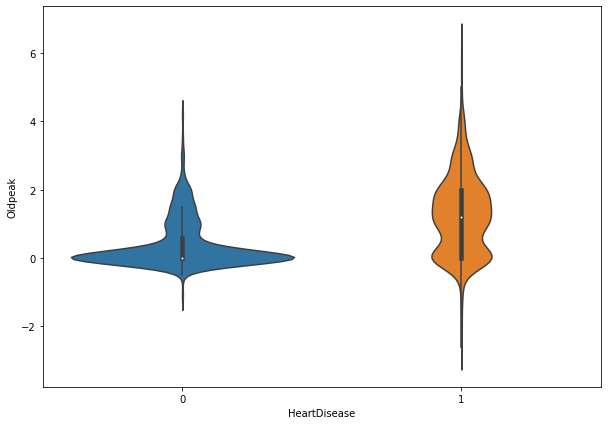

0

In [20]:
plot_violin(df["HeartDisease"], df["Oldpeak"])

In [21]:
df[(df["Oldpeak"] < 0.5) & (df["Oldpeak"] > -0.5)]["HeartDisease"].value_counts()

0    290
1    138
Name: HeartDisease, dtype: int64

In [22]:
df[(df["Oldpeak"] > 0.5) | (df["Oldpeak"] < -0.5)]["HeartDisease"].value_counts()

1    357
0    112
Name: HeartDisease, dtype: int64

* From the plot it can be concluded, that the patient having neat zero OldPeak will have less chance of a heart disease.
* And the patient having OldPeak not near zero will have more chance of a heart disease.
* The probability that the patient will have heart disease given that his/her Oldpeak value is in the range (0.5, -0.5) is 33%.
* The probability that the patient will have heart disease given that his/her Oldpeak value is not in range (0.5, -0.5) is 76%.

## Categorical Features

In [23]:
def fill_wedge(value):
    format_value = round(value, 2)
    return str(format_value) + "%"


def plot_pie(data, labels):
    fig = plt.figure(figsize=(10, 7))
    plt.pie(x=data, labels=labels, autopct=fill_wedge)
    plt.show()
    return

**Sex**

In [24]:
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

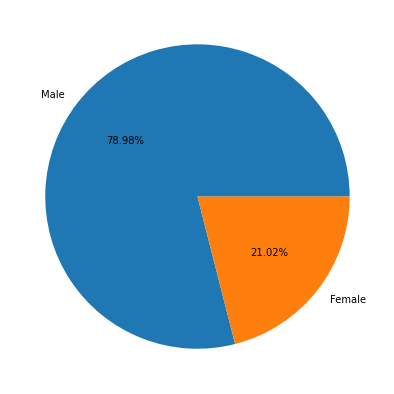

In [25]:
data = [df[df["Sex"] == "M"].shape[0], df[df["Sex"] == "F"].shape[0]]
labels = ["Male", "Female"]
plot_pie(data, labels)

* Sex tells the gender of the patient.
* This feature will not be used, because there is a severe imbalance of classes.
* There are 725 patients of sex male, and 193 patients of sex female.

**ChestPainType**

In [26]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

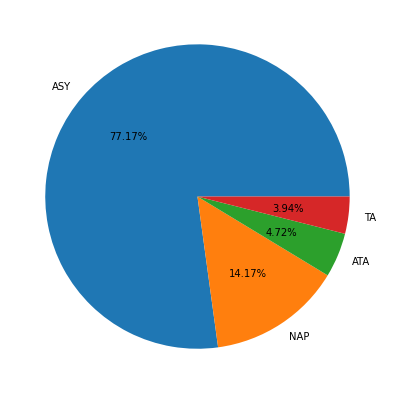

In [27]:
# Pie plot of patients with heart disease.
cpt1 = df[df["HeartDisease"] == 1]["ChestPainType"]
asy1 = cpt1[cpt1 == "ASY"].shape[0]
nap1 = cpt1[cpt1 == "NAP"].shape[0]
ata1 = cpt1[cpt1 == "ATA"].shape[0]
ta1 = cpt1[cpt1 == "TA"].shape[0]

data_cpt1 = [asy1, nap1, ata1, ta1]
labels_cpt = ["ASY", "NAP", "ATA", "TA"]

plot_pie(data_cpt1, labels_cpt)

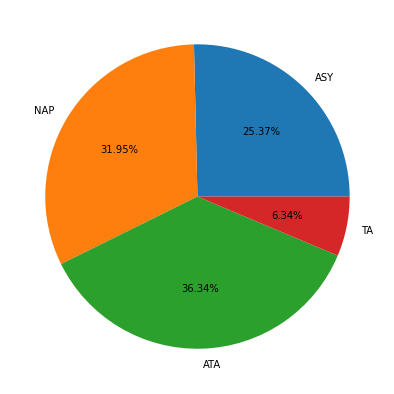

In [28]:
# Pie plot of patients without heart disease.
cpt0 = df[df["HeartDisease"] == 0]["ChestPainType"]
asy0 = cpt0[cpt0 == "ASY"].shape[0]
nap0 = cpt0[cpt0 == "NAP"].shape[0]
ata0 = cpt0[cpt0 == "ATA"].shape[0]
ta0 = cpt0[cpt0 == "TA"].shape[0]

data_cpt0 = [asy0, nap0, ata0, ta0]
plot_pie(data_cpt0, labels_cpt)

* ChestPainType tells the type of chest pain, it has  4 types given in the dataset.
* TA(Typical Angina), ATA(Atypical Angina), NAP(Non-Anginal Pain), ASY(Asymptomatic) in increasing order of serverity.
* The probability that the patient's chest pain type is ASY given that patient have heart disease is 77%.
* The probability that the patient's chest pain type is NAP, ATA given that patient do not have heart disease is 32%, 36% respectively.

**FastingBS**

In [29]:
df["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

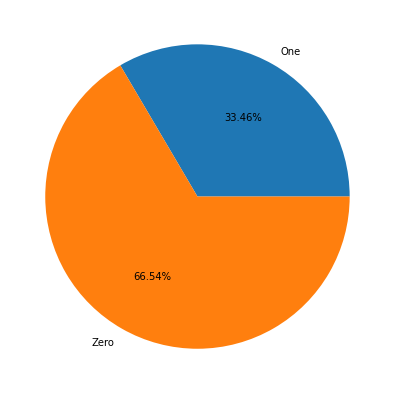

In [30]:
# pie plot of patients having heart disease
fastbs1 = df[df["HeartDisease"] == 1]["FastingBS"]
fastbs_one1 = fastbs1[fastbs1 == 1].shape[0]
fastbs_zero1 = fastbs1[fastbs1 == 0].shape[0]

data_fastbs1 = [fastbs_one1, fastbs_zero1]
labels_fastbs = ["One", "Zero"]

plot_pie(data_fastbs1, labels_fastbs)

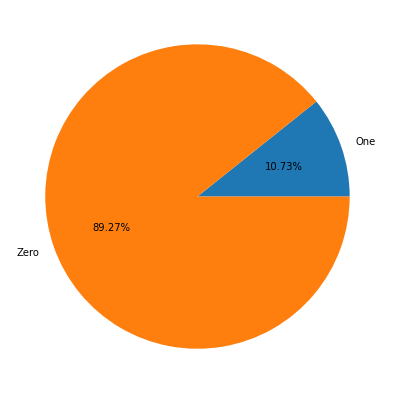

In [31]:
# pie plot of patients not having heart disease
fastbs0 = df[df["HeartDisease"] == 0]["FastingBS"]
fastbs_one0 = fastbs0[fastbs0 == 1].shape[0]
fastbs_zero0 = fastbs0[fastbs0 == 0].shape[0]

data_fastbs0 = [fastbs_one0, fastbs_zero0]

plot_pie(data_fastbs0, labels_fastbs)

* FatingBS tells the fasting blood sugar, (1: if FastingBS > 120 mg/dl, 0: otherwise)
* This feature will not be used, because of severe imbalance of classes.
* In both cases (with heart disease and without heart disease), '0' dominates.

**RestingECG**

In [32]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

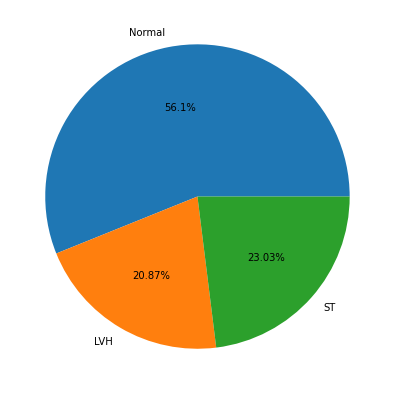

In [33]:
# pie plot of patients having heart disease
restecg1 = df[df["HeartDisease"] == 1]["RestingECG"]
norm1 = restecg1[restecg1 == "Normal"].shape[0]
lvh1 = restecg1[restecg1 == "LVH"].shape[0]
st1 = restecg1[restecg1 == "ST"].shape[0]

data_restecg1 = [norm1, lvh1, st1]
label_restecg = ["Normal", "LVH", "ST"]

plot_pie(data_restecg1, label_restecg)

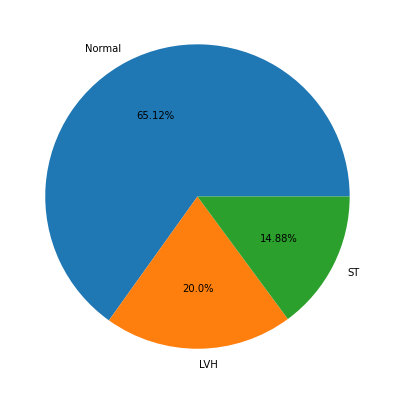

In [34]:
# pie plot of patients not having heart disease
restecg0 = df[df["HeartDisease"] == 0]["RestingECG"]
norm0 = restecg0[restecg0 == "Normal"].shape[0]
lvh0 = restecg0[restecg0 == "LVH"].shape[0]
st0 = restecg0[restecg0 == "ST"].shape[0]

data_restecg0 = [norm0, lvh0, st0]

plot_pie(data_restecg0, label_restecg)

* RestingECG tells resting electrocardiogram of the patient.
* Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria.
* This feature will not be used, because patients with normal RestingECG dominates both the pie plots of patients having heart disease and patients not having heart disease.
* And percentage of LVH and ST barely vary in both the plots.

**ExerciseAngina**

In [35]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

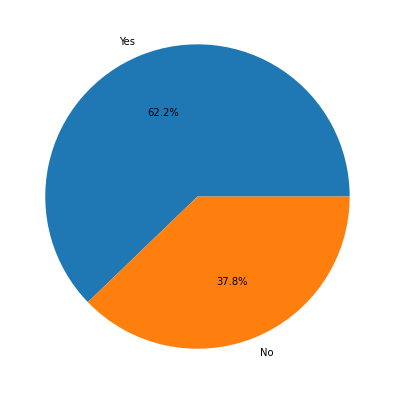

In [36]:
# pie plot of patients  having heart disease
exeang1 = df[df["HeartDisease"] == 1]["ExerciseAngina"]
exeangY1 = exeang1[exeang1 == "Y"].shape[0]
exeangN1 = exeang1[exeang1 == "N"].shape[0]

data_exeang1 = [exeangY1, exeangN1]
labels_exeang = ["Yes", "No"]

plot_pie(data_exeang1, labels_exeang)

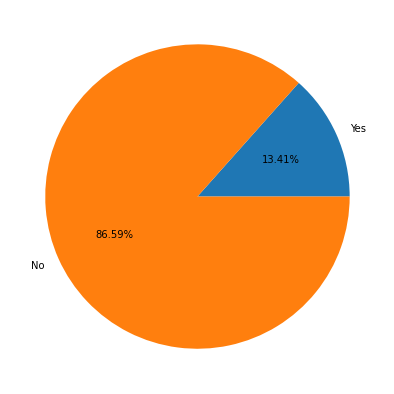

In [37]:
# pie plot of patients not having heart disease
exeang0 = df[df["HeartDisease"] == 0]["ExerciseAngina"]
exeangY0 = exeang0[exeang0 == "Y"].shape[0]
exeangN0 = exeang0[exeang0 == "N"].shape[0]

data_exeang0 = [exeangY0, exeangN0]

plot_pie(data_exeang0, labels_exeang)

* ExerciseAngina tells the induced angina during exercise/physical exertion.
* If ExerciseAngina is 'Yes', then the patient is likey to have heart disease.
* If ExerciseAngina is 'No', then the patient is not likely to have heart disease.
* The probability that the ExerciseAngina is Yes given that patient has heart disease is 62%.
* The probability that the ExerciseAngina is No given that patient don't have heart disease is 86.5%.

**ST_Slope**

In [38]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

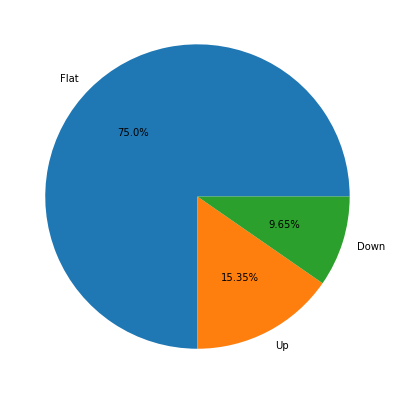

In [39]:
# pie plot of patients having heart disease
stslope1 = df[df["HeartDisease"] == 1]["ST_Slope"]
flat1 = stslope1[stslope1 == "Flat"].shape[0]
up1 = stslope1[stslope1 == "Up"].shape[0]
down1 = stslope1[stslope1 == "Down"].shape[0]

data_stslope1 = [flat1, up1, down1]
labels_stslope = ["Flat", "Up", "Down"]

plot_pie(data_stslope1, labels_stslope)

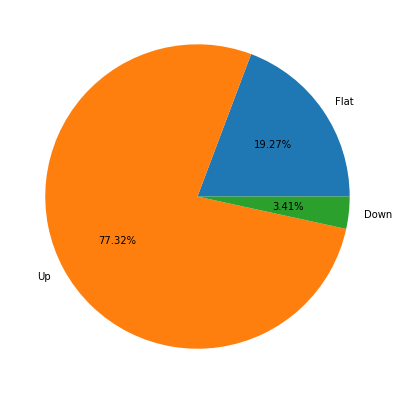

In [40]:
# pie plot of patients not having heart disease
stslope0 = df[df["HeartDisease"] == 0]["ST_Slope"]
flat0 = stslope0[stslope0 == "Flat"].shape[0]
up0 = stslope0[stslope0 == "Up"].shape[0]
down0 = stslope0[stslope0 == "Down"].shape[0]

data_stslope0 = [flat0, up0, down0]

plot_pie(data_stslope0, labels_stslope)

* ST_Slope tells the slope of the peak exercise ST segment.
* Up: upsloping, Flat: flat, Down: downsloping.
* Patient having Flat ST_Slope is more likely to have heart disease.
* Patients having Up ST_Slope is more likely to not have heart disease.

In [41]:
# Removing redundant features
redundant_features = ["Cholesterol", "MaxHR", "MaxHR_limit", "FastingBS", "RestingECG"]

df.drop(redundant_features, axis=1, inplace=True)

In [42]:
df.head()

,Age,Sex,ChestPainType,RestingBP,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,N,0.0,Up,0
1,49,F,NAP,160,N,1.0,Flat,1
2,37,M,ATA,130,N,0.0,Up,0
3,48,F,ASY,138,Y,1.5,Flat,1
4,54,M,NAP,150,N,0.0,Up,0


# Handling Class Imbalance

In [43]:
df_y = df.iloc[:, 7]
df_X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6]]

In [44]:
df_y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

* The majority class is 'Not Heart Disease'. 
* I will use undersampling technique to resolve this issue.
* I will reduce obeservations in majority class to 410.

In [45]:
rus = RandomUnderSampler(sampling_strategy={1: 410})
df_X, df_y = rus.fit_resample(df_X, df_y)

In [46]:
df_y.value_counts()

0    410
1    410
Name: HeartDisease, dtype: int64

# Handling Outliers

Text(0.5, 1.0, 'Oldpeak vs Heart Disease(Y/N)')

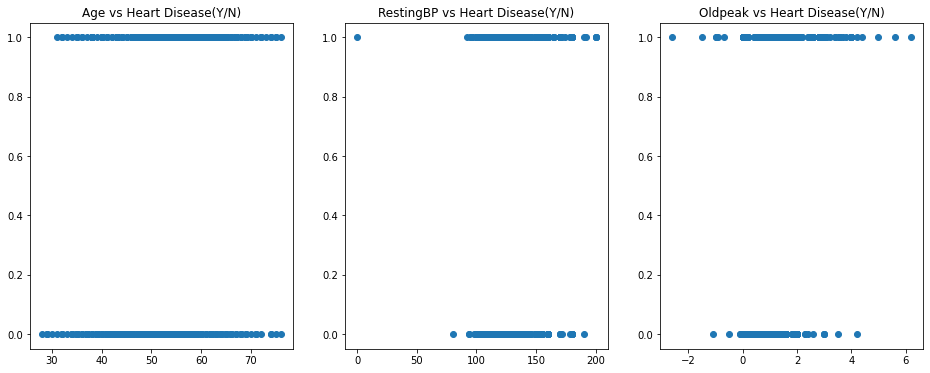

In [47]:
fig = plt.figure(figsize=(16, 6))

plot1 = plt.subplot2grid((1, 3), (0, 0))
plot2 = plt.subplot2grid((1, 3), (0, 1))
plot3 = plt.subplot2grid((1, 3), (0, 2))

plot1.scatter(df_X["Age"], df_y)
plot1.set_title("Age vs Heart Disease(Y/N)")

plot2.scatter(df_X["RestingBP"], df_y)
plot2.set_title("RestingBP vs Heart Disease(Y/N)")

plot3.scatter(df_X["Oldpeak"], df_y)
plot3.set_title("Oldpeak vs Heart Disease(Y/N)")

* In Age feature, there is not any outlier.
* In RestingBP feature, there is an obeservation having near zero RestingBP, which is not possible, Hence an outlier.
* In OldPeak feature, There is not any outlier.

In [48]:
df_X[df_X["RestingBP"] < 10]

,Age,Sex,ChestPainType,RestingBP,ExerciseAngina,Oldpeak,ST_Slope
676,55,M,NAP,0,N,1.5,Flat


In [49]:
# Removing the outlier
df_X.drop([791], axis=0, inplace=True)
df_y.drop([791], axis=0, inplace=True)

# Encoding Categorical Variables

In [50]:
# Encoding categorical variable using target encoding
tar_enc = TargetEncoder()
df_X = tar_enc.fit_transform(df_X, df_y)

In [51]:
df_X.head()

,Age,Sex,ChestPainType,RestingBP,ExerciseAngina,Oldpeak,ST_Slope
0,40,0.577532,0.102410,140,0.295635,0.0,0.163588
1,37,0.577532,0.102410,130,0.295635,0.0,0.163588
2,54,0.577532,0.317708,150,0.295635,0.0,0.163588
3,39,0.577532,0.317708,120,0.295635,0.0,0.163588
4,45,0.235294,0.102410,130,0.295635,0.0,0.163588


# Modeling

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size=0.7, test_size=0.3)

In [53]:
lambda_values = list(range(1, 100))

logloss_cv = []
logloss_train = []

kf = KFold(n_splits=5)

for lam in lambda_values:
    total_logloss_tr = []
    total_logloss_cv = []
    for train_index, cv_index in kf.split(X_train):
        trset_X, cvset_X = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
        trset_y, cvset_y = y_train.iloc[train_index], y_train.iloc[cv_index]
        
        model = LogisticRegression(C= (1/lam), penalty="l2", solver="liblinear")
        model.fit(trset_X, trset_y)
        
        trpred_y = model.predict(trset_X)
        cvpred_y = model.predict(cvset_X)
        
        logloss_trset = metrics.log_loss(trset_y, trpred_y)
        logloss_cvset = metrics.log_loss(cvset_y, cvpred_y)
        
        total_logloss_tr.append(logloss_trset)
        total_logloss_cv.append(logloss_cvset)
        
    avg_logloss_tr = sum(total_logloss_tr) / (len(total_logloss_tr))    
    avg_logloss_cv = sum(total_logloss_cv) / (len(total_logloss_cv))    
    
    logloss_train.append(avg_logloss_tr)
    logloss_cv.append(avg_logloss_cv)

In [54]:
optimal_lam = logloss_cv.index(min(logloss_cv)) + 1
print("Optimal Value of hyperparameter Lambda(1/C) is: " + str(optimal_lam))

Optimal Value of hyperparameter Lambda(1/C) is: 1


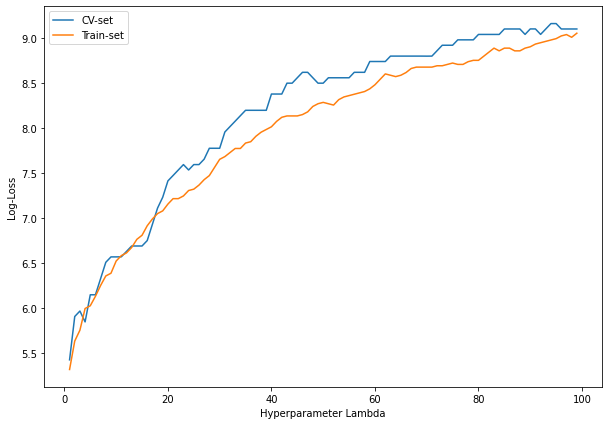

In [55]:
fig = plt.figure(figsize=(10, 7))
plt.plot(lambda_values, logloss_cv, label="CV-set")
plt.plot(lambda_values, logloss_train, label= "Train-set")
plt.xlabel("Hyperparameter Lambda")
plt.ylabel("Log-Loss")
plt.legend()
plt.show()

In [56]:
model = LogisticRegression(C=optimal_lam, solver="liblinear")
model.fit(X_train, y_train)

y_trpred = model.predict(X_train)

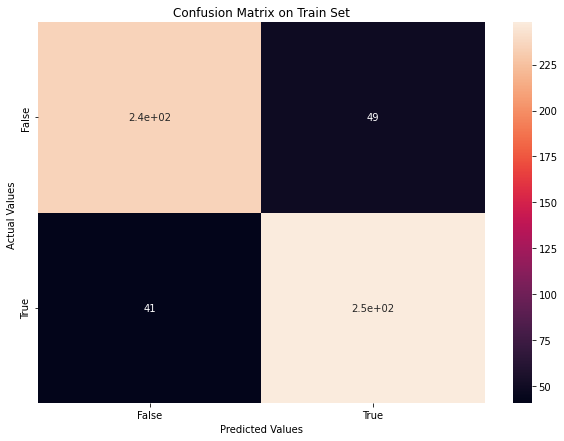

In [57]:
cf_matrix = metrics.confusion_matrix(y_train, y_trpred)
fig = plt.figure(figsize = (10, 7))
ax = sns.heatmap(cf_matrix, annot = True)
ax.set_title('Confusion Matrix on Train Set');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

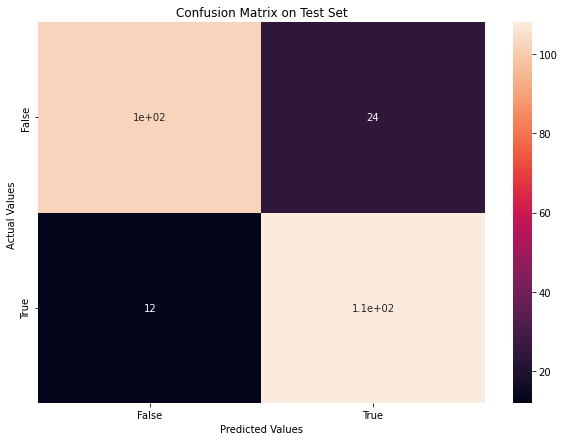

In [58]:
y_testpred = model.predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test, y_testpred)
fig = plt.figure(figsize = (10, 7))
ax = sns.heatmap(cf_matrix, annot = True)
ax.set_title('Confusion Matrix on Test Set');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [59]:
print(metrics.classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       126
           1       0.82      0.90      0.86       120

    accuracy                           0.85       246
   macro avg       0.86      0.85      0.85       246
weighted avg       0.86      0.85      0.85       246

